In [1]:
from sbi import utils as utils
from sbi.utils import pairplot, conditional_pairplot, conditional_corrcoeff
import torch
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML, Image

import sbi
print(sbi.__version__)
print(sbi.__file__)

_ = torch.manual_seed(0)

0.14.2
/home/jnsbck/Uni/Master/WiSe20,21/Lab Rotation/project_repo/code/conditional_density_example/sbi/__init__.py


In [3]:
from toy_posterior_for_07_cc import ExamplePosterior
posterior = ExamplePosterior()

In [4]:
x_o = torch.ones(1, 20)  # simulator output was 20-dimensional
posterior.set_default_x(x_o)

/home/jnsbck/Uni/Master/WiSe20,21/Lab Rotation/project_repo/code/conditional_density_example/sbi/utils/plot.py:181: UserWarning: Importing `pairplot` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import pairplot`.
  "Importing `pairplot` from `sbi.utils` is deprecated since sbi "
/home/jnsbck/Uni/Master/WiSe20,21/Lab Rotation/project_repo/code/conditional_density_example/sbi/utils/plot.py:198: UserWarning: You passed an argument `fig_size`. Since sbi v0.15.0, the argument should be called `figsize`. In future versions, `fig_size` will no longer be supported.
  "You passed an argument `fig_size`. Since sbi v0.15.0, the argument "


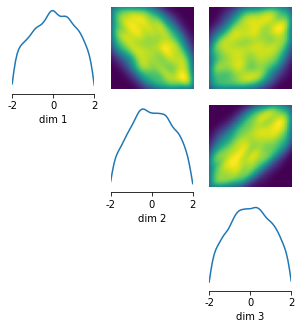

In [5]:
posterior_samples = posterior.sample((5000,))

fig, ax = pairplot(
    samples=posterior_samples,
    limits=torch.tensor([[-2., 2.]]*3),
    upper=['kde'],
    diag=['kde'],
    fig_size=(5,5)
)

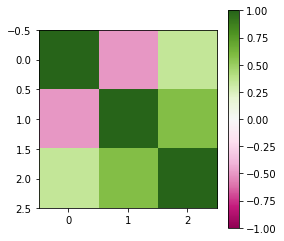

In [6]:
corr_matrix_marginal = np.corrcoef(posterior_samples.T)
fig, ax = plt.subplots(1,1, figsize=(4, 4))
im = plt.imshow(corr_matrix_marginal, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)

/home/jnsbck/Uni/Master/WiSe20,21/Lab Rotation/project_repo/code/conditional_density_example/sbi/utils/plot.py:426: UserWarning: Importing `conditional_pairplot` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import conditional_pairplot`.
  "Importing `conditional_pairplot` from `sbi.utils` is deprecated since sbi "
/home/jnsbck/Uni/Master/WiSe20,21/Lab Rotation/project_repo/code/conditional_density_example/sbi/utils/plot.py:443: UserWarning: You passed an argument `fig_size`. Since sbi v0.15.0, the argument should be called `figsize`. In future versions, `fig_size` will no longer be supported.
  "You passed an argument `fig_size`. Since sbi v0.15.0, the argument "
/home/jnsbck/Uni/Master/WiSe20,21/Lab Rotation/project_repo/code/conditional_density_example/sbi/utils/conditional_density.py:58: UserWarning: Importing `eval_conditional_density` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import eval_conditional_densi

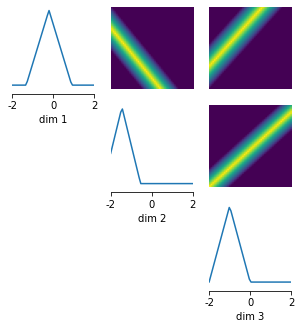

In [7]:
condition = posterior.sample((1,))

_ = conditional_pairplot(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2., 2.]]*3),
    fig_size=(5,5)
)

/home/jnsbck/Uni/Master/WiSe20,21/Lab Rotation/project_repo/code/conditional_density_example/sbi/utils/conditional_density.py:137: UserWarning: Importing `conditional_corrcoeff` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import conditional_corrcoeff`.
  "Importing `conditional_corrcoeff` from `sbi.utils` is deprecated since "
/home/jnsbck/Uni/Master/WiSe20,21/Lab Rotation/project_repo/code/conditional_density_example/sbi/utils/conditional_density.py:58: UserWarning: Importing `eval_conditional_density` from `sbi.utils` is deprecated since sbi v0.15.0. Instead, use `from sbi.analysis import eval_conditional_density`.
  "Importing `eval_conditional_density` from `sbi.utils` is deprecated since "


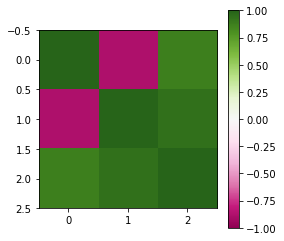

In [8]:
cond_coeff_mat = conditional_corrcoeff(
    density=posterior,
    condition=condition,
    limits=torch.tensor([[-2., 2.]]*3),
)
fig, ax = plt.subplots(1,1, figsize=(4,4))
im = plt.imshow(cond_coeff_mat, clim=[-1, 1], cmap='PiYG')
_ = fig.colorbar(im)